<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-09/Jobsheet(Praktikum)_ANN_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1

In [1]:
# Langkah 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Langkah 1

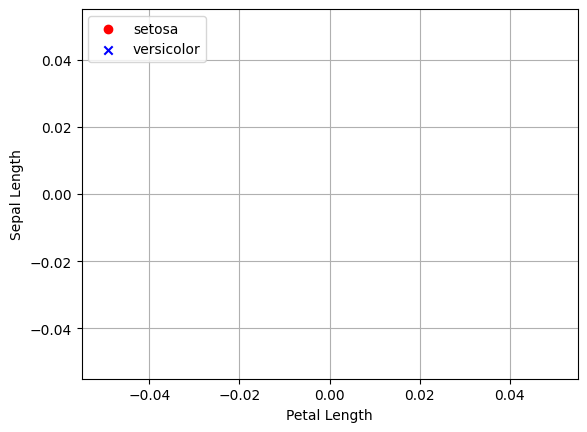

In [6]:
df = pd.read_csv('Iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### Langkah 3 - Membuat Perceptron

In [17]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += int(update)
                self.w_[1:] += int(update) * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, int(self.w_[1:])) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### Langkah 4 - Pilih Data dan Encoding Label

In [9]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

#### Langkah 5 - Fitting Model

In [18]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

TypeError: ignored

## Praktikum 2

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

#### Langkah *1* - Import Library

In [19]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

#### Langkah 2 - Pilih Label dan Split Data

In [20]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

#### Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [21]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## Praktikum 3

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

#### Langkah 1 - Import Library

In [24]:
from sklearn.neural_network import MLPClassifier

#### Langkah 2 - Buat Data

In [25]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

#### Langkah 3 - Fit Model

In [26]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

#### Langkah 4 - Prediksi

In [28]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Praktikum 4 - Klasifikasi ANN

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

### Pra Pengolahan Data

#### Langkah 1 - Import Library

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### Langkah 2 - Load Data

In [30]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [31]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
# Cek data X
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [36]:
# Cek data y
print(y)

[1 0 1 ... 1 1 0]


#### Langkah 3 - Encoding Data Kategorikal

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [38]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#### Langkah 5 - Split Data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Langkah 6 - Scaling Fitur

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Membuat Model ANN

#### Langkah 1 - Inisiasi Model ANN

In [44]:
ann = tf.keras.models.Sequential()

#### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [45]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Langkah 3 - Membuat Hidden Layer Kedua

In [46]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### Langkah 4 - Membuat Output Layer

In [47]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training Model

#### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [48]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Langkah 2 - Fitting Model

In [49]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5931 - accuracy: 0.7216
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4636 - accuracy: 0.8111
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8133
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8191
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.8204
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8286
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8372
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8439
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8494
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3576 - accura

### Membuat Prediksi

Diberikan informasi sebagai berikut,
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: $60000

* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

#### Modelkan Data Baru dan Buat Prediksi

In [50]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 157ms/step
[[False]]


#### Prediksi Dengan Data Testing

In [51]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Cek Akurasi dan Confussion matrix

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1515   80]
 [ 193  212]]


0.8635